In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
sub = pd.read_csv('input/sample_submission.csv')
print(train.shape, test.shape)

(4752, 60) (11520, 41)


In [68]:
train['Y16'].isnull().sum()

432

In [69]:
train

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.00,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.00,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.00,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.00,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.00,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,0.0,274.9,0.0,275.5,0.9,0.0,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,0.0,277.3,0.0,247.0,1.0,0.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [32]:
# temperature_name = ["X00","X07","X28","X31","X32"] #기압
# localpress_name  = ["X01","X06","X22","X27","X29"] #현지기압
# speed_name       = ["X02","X03","X18","X24","X26"] #풍속
# water_name       = ["X04","X10","X21","X36","X39"] #일일 누적강수량
# press_name       = ["X05","X08","X09","X23","X33"] #해면기압
# sun_name         = ["X11","X14","X16","X19","X34"] #일일 누적일사량
# humidity_name    = ["X12","X20","X30","X37","X38"] #습도
# direction_name   = ["X13","X15","X17","X25","X35"] #풍향

In [33]:
subset_train1 = train.reset_index(drop=True).loc[:4319, 'id':'X39'].copy()
subset_target1 = train.reset_index(drop=True).loc[:4319, ['Y13', 'Y15', 'Y16']].copy()

subset_train2 = train.reset_index(drop=True).loc[4320:, 'id':'X39'].copy()
subset_target2 = train.reset_index(drop=True).loc[4320:, 'Y18'].copy()
subset_train1

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.00,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.00,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.00,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.00,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.00,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,1007.5,0.0,13.21,92.0,227.5,0.0,304.0,0.0,10.7,0.4,0.0,84.1,0.0,1001.2,1008.2,0.4,328.4,0.6,1006.6,21.6,1000.1,82.3,18.8,19.4,1008.2,16.68,272.9,0.0,82.3,74.3,0.0
4316,4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,1007.4,0.0,13.21,92.0,259.4,0.0,309.1,0.0,0.7,0.3,0.0,85.7,0.0,1001.2,1008.2,0.2,346.7,1.1,1006.8,21.6,1000.1,85.8,18.6,18.5,1008.4,16.68,315.9,0.0,82.4,74.8,0.0
4317,4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,1007.5,0.0,13.21,91.9,256.1,0.0,318.6,0.0,54.7,0.9,0.0,85.9,0.0,1001.2,1008.3,0.9,342.1,0.5,1006.8,21.5,1000.2,84.1,18.4,19.1,1008.4,16.68,343.3,0.0,82.8,75.4,0.0
4318,4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,1007.5,0.0,13.21,92.1,203.9,0.0,327.7,0.0,116.1,0.4,0.0,83.7,0.0,1001.2,1008.1,0.7,345.5,0.5,1006.8,21.3,1000.0,85.4,18.2,19.0,1008.4,16.68,341.7,0.0,82.8,75.8,0.0


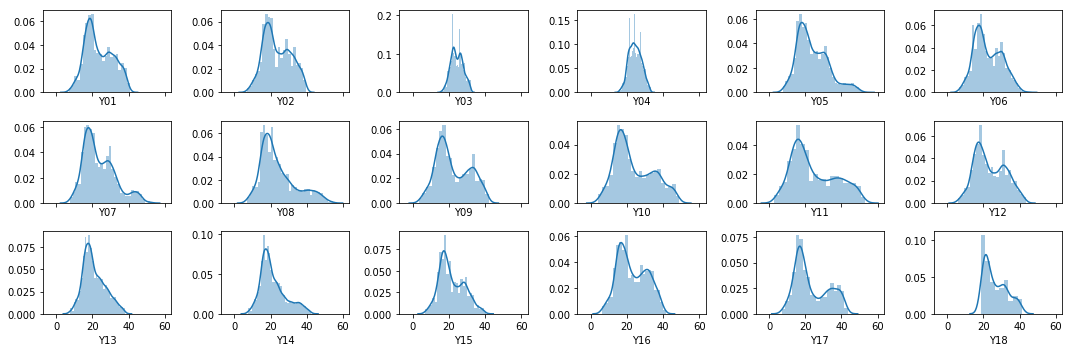

In [34]:
fig, axes = plt.subplots(3, 6, figsize=(15,5), sharex=True)
for i, col in enumerate(train.loc[:, 'Y01':'Y18'].columns):
    sns.distplot(train[col].dropna(), ax=axes.flat[i])
fig.tight_layout()
plt.show()

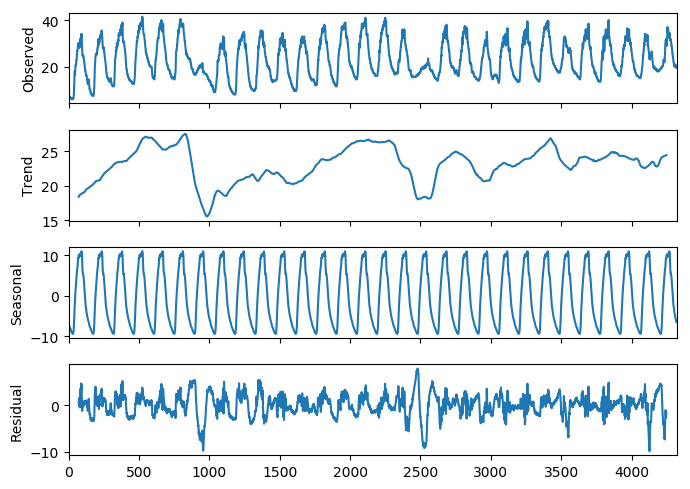

In [35]:
import statsmodels.api as sm

fig, axes = plt.subplots(4, 1, figsize=(7,5), dpi=100, sharex=True)
decompose = sm.tsa.seasonal_decompose(train.loc[:4319, 'Y16'], freq=144)
decompose.observed.plot(ax=axes.flat[0])
axes[0].set_ylabel('Observed')
decompose.trend.plot(ax=axes.flat[1])
axes[1].set_ylabel('Trend')
decompose.seasonal.plot(ax=axes.flat[2])
axes[2].set_ylabel('Seasonal')
decompose.resid.plot(ax=axes.flat[3])
axes[3].set_ylabel('Residual')
# axes[3].grid(axis='y', ls='--')
fig.tight_layout()
plt.show()

In [36]:
# from scipy.interpolate import interp1d

# s = train.loc[:4319, 'X07']
# s_sqrd = s * s
# plt.plot(s_sqrd)
# plt.show()

In [37]:
# ?pd.DataFrame.hist

In [38]:
# sub_train1 = sub_train1.drop(['X14', 'X16', 'X19'], axis=1)
# sub_train2 = sub_train2.drop(['X14', 'X16', 'X19'], axis=1)

def trans_time(df, start=0, end=4319):
    results = {}
    minutes = pd.Series((df.loc[start:end, 'id'] % 144).astype(int), name='Minutes')
    hours = pd.Series((df.iloc[start:end].index % 144 / 6).astype(int), name='Hours')
    results['minutes'] = minutes
    results['hours'] = hours
    
    min_in_day = 24 * 6
    hour_in_day = 24
    results['min_in_day'] = min_in_day
    results['hour_in_day'] = hour_in_day

    minute_sin = pd.Series(np.sin(np.pi*minutes / min_in_day), name='MinSin')
    minute_cos = pd.Series(np.cos(np.pi*minutes / min_in_day), name='MinCos')
    results['minute_sin'] = minute_sin
    results['minute_cos'] = minute_cos

    hour_sin  = pd.Series(np.sin(np.pi*hours / min_in_day), name='HourSin')
    hour_cos  = pd.Series(np.cos(np.pi*hours / min_in_day), name='HourCos')
    results['hour_sin'] = hour_sin
    results['hour_cos'] = hour_cos
    
    return results

In [39]:
times1 = trans_time(subset_train1)

concat_train1 = pd.concat([
    subset_train1, 
    times1['minutes'], 
    times1['hours'], 
    times1['minute_sin'], 
    times1['minute_cos'],
    times1['hour_sin'],
    times1['hour_cos'],
    subset_target1['Y15']
], ignore_index=True, axis=1)

concat_train2 = pd.concat([
    subset_train1, 
    times1['minutes'], 
    times1['hours'], 
    times1['minute_sin'], 
    times1['minute_cos'],
    times1['hour_sin'],
    times1['hour_cos'],
    subset_target1['Y16']
], ignore_index=True, axis=1)

# concat_train3 = pd.concat([
#     subset_train1, 
#     times1['minutes'], 
#     times1['hours'], 
#     times1['minute_sin'], 
#     times1['minute_cos'],
#     times1['hour_sin'],
#     times1['hour_cos'],
#     subset_target1['Y13']
# ], ignore_index=True, axis=1)

subset_train2 = subset_train2.reset_index(drop=True)
subset_target2 = subset_target2.reset_index(drop=True)
times2 = trans_time(subset_train2, end=432)

concat_train4 = pd.concat([
    subset_train2, 
    times2['minutes'], 
    times2['hours'], 
    times2['minute_sin'], 
    times2['minute_cos'],
    times2['hour_sin'],
    times2['hour_cos'],
    subset_target2
], ignore_index=True, axis=1)

concat_train4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
0,4320,19.3,987.7,0.9,2.2,0.0,1007.7,988.0,20.8,1007.8,1007.4,0.0,0.00,93.2,162.5,0.0,312.8,0.0,0.0,0.5,0.0,87.0,0.0,1001.1,1008.2,1.1,257.5,0.0,1006.7,21.0,1000.1,87.6,18.0,18.7,1008.3,0.00,353.5,0.0,84.0,77.6,0.0,0,0,0.000000,1.000000,0.000000,1.000000,20.5
1,4321,19.0,987.6,1.9,2.2,0.0,1007.7,988.0,20.6,1007.8,1007.4,0.0,0.00,93.7,317.4,0.0,308.9,0.0,0.0,0.1,0.0,89.2,0.0,1001.1,1008.2,0.4,262.5,0.1,1006.7,20.7,1000.1,86.4,17.7,19.0,1008.3,0.00,303.1,0.0,84.4,79.2,0.0,1,0,0.021815,0.999762,0.000000,1.000000,20.5
2,4322,19.1,987.6,2.0,1.4,0.0,1007.8,988.1,20.5,1007.9,1007.4,0.0,0.00,93.6,0.0,0.0,294.1,0.0,0.0,0.0,0.0,89.2,0.0,1001.2,1008.2,0.1,343.5,0.0,1006.7,20.7,1000.1,85.7,17.4,19.2,1008.3,0.00,307.3,0.0,84.9,79.9,0.0,2,0,0.043619,0.999048,0.000000,1.000000,20.5
3,4323,19.2,987.7,1.8,1.5,0.0,1007.9,988.1,20.5,1007.9,1007.5,0.0,0.00,93.7,0.0,0.0,297.6,0.0,0.0,0.0,0.0,89.8,0.0,1001.3,1008.2,0.0,0.0,0.0,1006.8,20.6,1000.1,85.1,17.5,19.3,1008.4,0.00,315.6,0.0,84.9,80.7,0.0,3,0,0.065403,0.997859,0.000000,1.000000,20.5
4,4324,19.2,987.8,1.4,1.4,0.0,1007.9,988.1,20.5,1007.8,1007.6,0.0,0.00,93.9,0.0,0.0,277.4,0.0,0.0,0.0,0.0,89.7,0.0,1001.3,1008.3,0.0,0.0,0.0,1006.8,20.5,1000.2,84.9,17.4,19.5,1008.4,0.00,321.2,0.0,84.9,80.9,0.0,4,0,0.087156,0.996195,0.000000,1.000000,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,0.0,274.9,0.0,275.5,0.9,0.0,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,139,23,0.108867,-0.994056,0.480989,0.876727,21.5
428,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,0.0,277.3,0.0,247.0,1.0,0.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,140,23,0.087156,-0.996195,0.480989,0.876727,21.5
429,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,141,23,0.065403,-0.997859,0.480989,0.876727,21.5
430,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,142,23,0.043619,-0.999048,0.480989,0.876727,21.5


In [40]:
# train_data = pd.concat([concat_train1, 
#                         concat_train2], ignore_index=True, axis=0)

train_data1 = pd.concat([
    concat_train1, 
    concat_train4, 
], ignore_index=True, axis=0)
print(train_data1.shape)

# train_data1 = pd.concat([
#     concat_train1, 
#     concat_train2, 
# ], ignore_index=True, axis=0)
# print(train_data1.shape)

train_data2 = pd.concat([
    concat_train1, 
    concat_train2, 
    concat_train4
], ignore_index=True, axis=0)
print(train_data2.shape)

columns = ['id'] + [f'X{i:02}' for i in range(40)] + ['Minutes', 'Hours', 'MinSin', 'MinCos', 'HourSin', 'HourCos', 'Target']
print(len(columns))
train_data1.columns = columns
train_data2.columns = columns
train_data1

(4752, 48)
(9072, 48)
48


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Minutes,Hours,MinSin,MinCos,HourSin,HourCos,Target
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.00,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0,0.0,0.000000,1.000000,0.000000,1.000000,9.0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.00,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,1,0.0,0.021815,0.999762,0.000000,1.000000,9.0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.00,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,2,0.0,0.043619,0.999048,0.000000,1.000000,8.5
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.00,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,3,0.0,0.065403,0.997859,0.000000,1.000000,8.5
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.00,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,4,0.0,0.087156,0.996195,0.000000,1.000000,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,1007.4,2.5,23.88,95.3,333.1,0.0,274.9,0.0,275.5,0.9,0.0,89.7,10.5,1000.4,1007.5,0.0,0.0,1.2,1006.0,23.8,999.4,89.9,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,139,23.0,0.108867,-0.994056,0.480989,0.876727,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,1007.4,2.5,23.88,95.6,216.4,0.0,277.3,0.0,247.0,1.0,0.0,90.1,10.5,1000.3,1007.5,0.0,0.0,1.3,1006.0,23.6,999.4,91.3,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,140,23.0,0.087156,-0.996195,0.480989,0.876727,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,1007.5,2.5,23.88,95.9,127.8,0.0,256.1,0.0,299.1,0.6,0.0,90.8,10.5,1000.4,1007.6,0.0,0.0,0.2,1006.0,23.6,999.5,90.2,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,141,23.0,0.065403,-0.997859,0.480989,0.876727,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,1007.5,2.5,23.88,95.9,323.8,0.0,255.1,0.0,0.0,0.6,0.0,91.5,10.5,1000.4,1007.6,0.0,0.0,0.1,1006.0,23.3,999.5,90.1,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,142,23.0,0.043619,-0.999048,0.480989,0.876727,21.5


In [41]:
# columns = dict(zip(range(0, 40), [f'X{i:02}' for i in range(40)]))
# columns[40] = 'Target'
# train_data = train_data.rename(columns=columns)
X1 = train_data1.drop(['Target'], axis=1).copy()
y1 = train_data1['Target'].copy()
print(X1.shape, y1.shape)

X2 = train_data2.drop(['Target'], axis=1).copy()
y2 = train_data2['Target'].copy()
print(X2.shape, y2.shape)

def same_min_max(df):
    columns = df.columns[df.max() == df.min()]
    print(columns)
    return df.drop(df.columns[df.max() != df.min()], axis=1)

X1 = X1.drop(same_min_max(X1), axis=1)
X2 = X2.drop(same_min_max(X2), axis=1)
X1.head()

(4752, 47) (4752,)
(9072, 47) (9072,)
Index(['X14', 'X16', 'X19'], dtype='object')
Index(['X14', 'X16', 'X19'], dtype='object')


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Minutes,Hours,MinSin,MinCos,HourSin,HourCos
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,101.1,56.1,0.3,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,0,0.0,0.000000,1.000000,0.0,1.0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,165.3,0.0,0.4,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,1,0.0,0.021815,0.999762,0.0,1.0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,144.0,0.0,0.6,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,2,0.0,0.043619,0.999048,0.0,1.0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,115.9,294.1,0.1,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,3,0.0,0.065403,0.997859,0.0,1.0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,124.7,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,4,0.0,0.087156,0.996195,0.0,1.0


In [42]:
times_test = trans_time(test, end=11520)

concat_test = pd.concat([
    test, 
    times_test['minutes'], 
    times_test['hours'], 
    times_test['minute_sin'], 
    times_test['minute_cos'],
    times_test['hour_sin'],
    times_test['hour_cos'],
], ignore_index=True, axis=1)

test_data = concat_test.copy()
columns = ['id'] + [f'X{i:02}' for i in range(40)] + ['Minutes', 'Hours', 'MinSin', 'MinCos', 'HourSin', 'HourCos']
print(len(columns))
test_data.columns = columns
test_data

47


,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Minutes,Hours,MinSin,MinCos,HourSin,HourCos
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,0.0,199.6,0.0,36.0,1.1,0.0,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0,0,0,0.000000,1.000000,0.000000,1.000000
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,0.0,194.0,0.0,127.7,0.6,0.0,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0,1,0,0.021815,0.999762,0.000000,1.000000
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,0.0,172.9,0.0,59.0,0.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0,2,0,0.043619,0.999048,0.000000,1.000000
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,0.0,153.5,0.0,54.9,0.4,0.0,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0,3,0,0.065403,0.997859,0.000000,1.000000
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,0.0,173.8,0.0,48.8,0.8,0.0,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0,4,0,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,88.1,65.6,0.0,101.6,0.0,176.7,1.8,0.0,77.3,0.0,1005.2,1012.9,1.6,169.8,4.5,1011.5,27.7,1004.9,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5,139,23,0.108867,-0.994056,0.480989,0.876727
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,75.5,51.9,0.0,84.8,0.0,187.8,2.9,0.0,78.1,0.0,1005.2,1012.9,1.9,138.9,4.7,1011.4,27.6,1004.9,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5,140,23,0.087156,-0.996195,0.480989,0.876727
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,0.0,17.1,77.5,29.0,0.0,104.5,0.0,184.8,2.9,0.0,78.9,0.0,1005.4,1013.0,2.3,146.7,4.8,1011.4,27.5,1005.0,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5,141,23,0.065403,-0.997859,0.480989,0.876727
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,1012.6,0.0,17.1,74.1,30.0,0.0,103.0,0.0,187.8,3.4,0.0,79.7,0.0,1005.3,1013.0,1.7,146.5,3.5,1011.4,27.3,1005.0,77.3,25.3,24.2,1012.9,19.56,174.2,0.0,80.1,68.8,0.5,142,23,0.043619,-0.999048,0.480989,0.876727


In [43]:
test = test_data.drop(['X14', 'X16', 'X19'], axis=1).copy()
print(X1.shape, y1.shape, test.shape)

(4752, 44) (4752,) (11520, 44)


In [44]:
test

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X15,X17,X18,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Minutes,Hours,MinSin,MinCos,HourSin,HourCos
0,4752,18.7,987.4,1.5,1.3,0.0,1006.8,987.7,21.1,1007.5,1007.2,0.0,0.0,96.1,333.6,199.6,36.0,1.1,94.7,0.0,1000.3,1007.6,0.0,0.0,0.1,1006.0,23.2,999.5,91.4,17.5,19.2,1007.6,0.00,194.7,0.0,84.0,59.9,0.0,0,0,0.000000,1.000000,0.000000,1.000000
1,4753,18.8,987.4,1.1,1.2,0.0,1006.7,987.7,21.2,1007.5,1007.2,0.0,0.0,96.2,335.5,194.0,127.7,0.6,95.3,0.0,1000.2,1007.5,0.0,0.0,0.3,1005.9,23.1,999.4,91.6,17.4,19.1,1007.5,0.00,173.1,0.0,84.0,60.5,0.0,1,0,0.021815,0.999762,0.000000,1.000000
2,4754,19.0,987.4,1.3,1.2,0.0,1006.6,987.6,21.2,1007.4,1007.2,0.0,0.0,96.4,0.0,172.9,59.0,0.0,93.9,0.0,1000.1,1007.4,0.0,0.0,0.7,1005.9,23.1,999.3,92.0,17.2,19.0,1007.5,0.00,208.6,0.0,85.0,60.8,0.0,2,0,0.043619,0.999048,0.000000,1.000000
3,4755,18.7,987.4,2.3,0.8,0.0,1006.6,987.6,21.1,1007.4,1007.2,0.0,0.0,96.5,252.9,153.5,54.9,0.4,94.4,0.0,1000.1,1007.4,0.0,0.0,0.6,1005.8,22.8,999.3,93.0,17.2,18.8,1007.4,0.00,185.0,0.0,85.8,61.2,0.0,3,0,0.065403,0.997859,0.000000,1.000000
4,4756,18.4,987.4,1.1,0.7,0.0,1006.7,987.7,20.9,1007.5,1007.2,0.0,0.0,96.6,238.2,173.8,48.8,0.8,95.7,0.0,1000.2,1007.3,0.0,0.0,0.7,1005.9,22.8,999.2,92.3,17.4,18.9,1007.5,0.00,162.8,0.0,87.3,61.7,0.0,4,0,0.087156,0.996195,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,16267,25.7,993.2,3.9,3.8,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,88.1,65.6,101.6,176.7,1.8,77.3,0.0,1005.2,1012.9,1.6,169.8,4.5,1011.5,27.7,1004.9,76.6,23.6,24.4,1013.0,19.56,169.6,0.0,79.7,67.5,0.5,139,23,0.108867,-0.994056,0.480989,0.876727
11516,16268,25.6,993.2,3.0,3.0,0.0,1011.7,993.8,26.3,1013.3,1012.6,0.0,17.1,75.5,51.9,84.8,187.8,2.9,78.1,0.0,1005.2,1012.9,1.9,138.9,4.7,1011.4,27.6,1004.9,76.7,25.3,24.4,1012.9,19.56,175.9,0.0,79.6,67.9,0.5,140,23,0.087156,-0.996195,0.480989,0.876727
11517,16269,25.6,993.2,3.8,2.5,0.0,1011.9,993.7,26.2,1013.2,1012.7,0.0,17.1,77.5,29.0,104.5,184.8,2.9,78.9,0.0,1005.4,1013.0,2.3,146.7,4.8,1011.4,27.5,1005.0,77.1,24.9,24.3,1012.9,19.56,204.7,0.0,79.2,68.3,0.5,141,23,0.065403,-0.997859,0.480989,0.876727
11518,16270,25.5,993.2,2.4,2.8,0.0,1011.8,993.7,26.1,1013.2,1012.6,0.0,17.1,74.1,30.0,103.0,187.8,3.4,79.7,0.0,1005.3,1013.0,1.7,146.5,3.5,1011.4,27.3,1005.0,77.3,25.3,24.2,1012.9,19.56,174.2,0.0,80.1,68.8,0.5,142,23,0.043619,-0.999048,0.480989,0.876727


In [45]:
pd.concat([X1.describe().T[['mean', 'min', 'max']], test.describe().T[['mean', 'min', 'max']]], sort=False, axis=1)

,mean,min,max,mean,min,max
id,2375.500000,0.000000,4751.000000,10511.500000,4752.000000,16271.000000
X00,20.227904,8.300000,30.900000,25.145625,15.500000,36.300000
X01,988.621107,977.300000,997.200000,987.616693,970.300000,998.100000
X02,1.509764,0.000000,10.200000,1.401033,0.000000,11.000000
X03,1.453157,0.000000,5.800000,1.479436,0.000000,10.900000
X04,1.270223,0.000000,25.600000,2.396016,0.000000,46.500000
X05,1008.333902,997.200000,1016.800000,1006.869314,990.000000,1018.000000
X06,989.005093,978.100000,997.400000,987.839045,971.300000,998.500000
X07,21.658081,11.600000,32.700000,26.032352,17.300000,36.000000
X08,1008.790341,997.300000,1017.500000,1007.321424,990.500000,1018.500000


In [59]:
ma = pd.concat([X1['X07'], test.loc[:, 'X07']], axis=0).rolling(window=144).mean()
print(ma.shape)

(16272,)


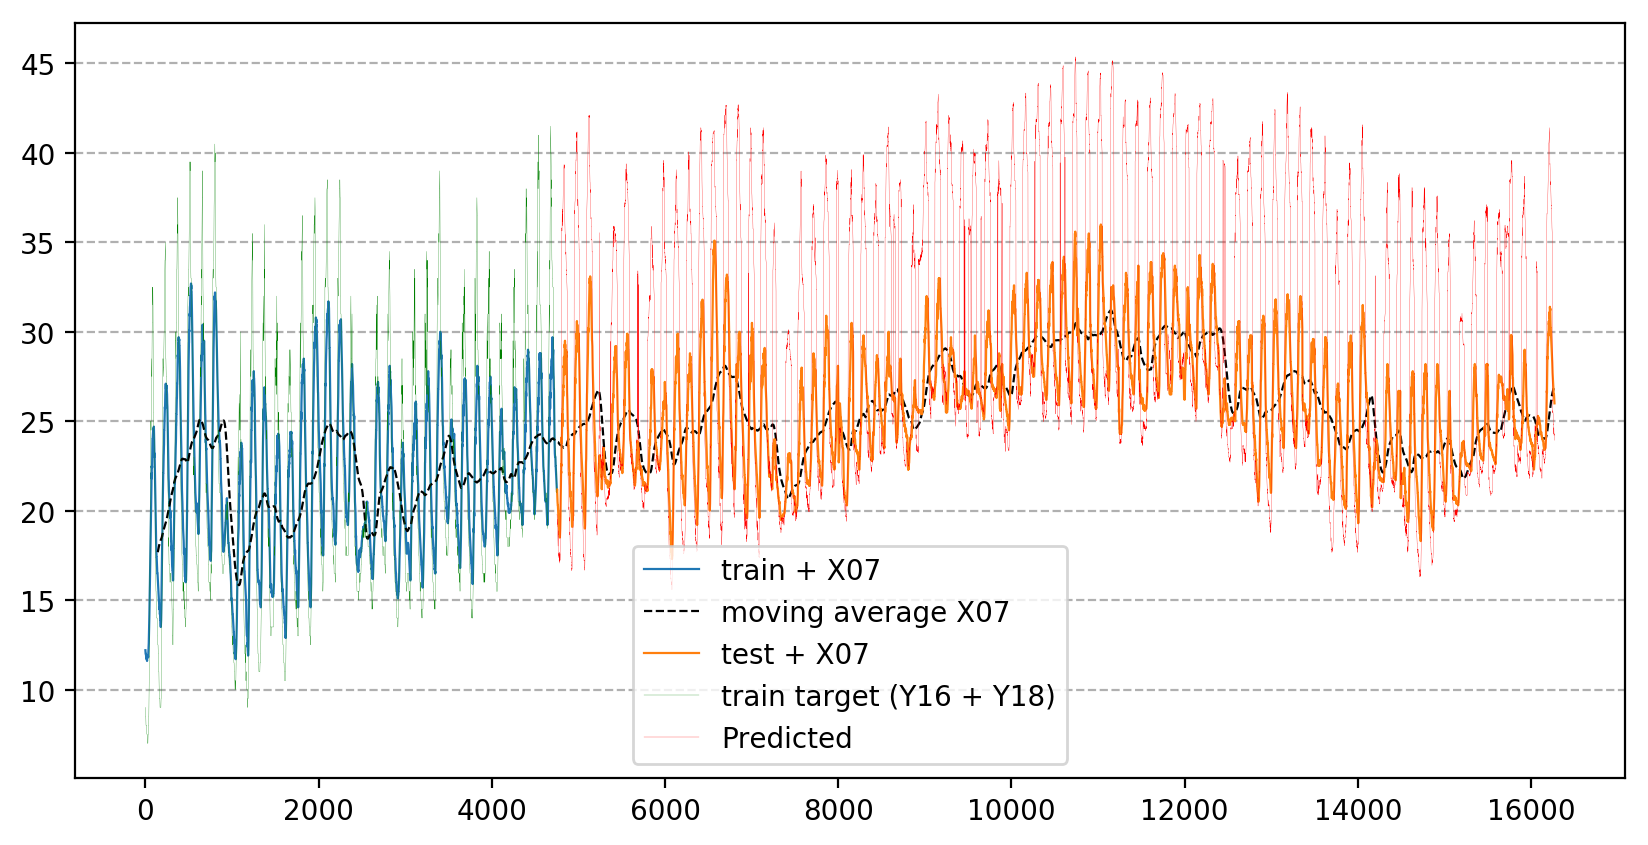

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), dpi=200, sharey=True)
ax.plot(X1['X07'], lw=0.8, label='train + X07')
ax.plot(range(0, 16272), ma.values, lw=0.8, ls='--', c='black', label='moving average X07')
ax.plot(range(4752, 16272), test.loc[:, 'X07'], lw=0.8, label='test + X07')
ax.plot(y1, lw=0.1, label='train target (Y16 + Y18)', c='g')
# ax.plot(range(4752, 16272), test_preds1, c='r', lw=0.1, label='Predicted')
ax.plot(range(4752, 16272), np.where(test_preds1 > ma.iloc[4752:].values, (test_preds1 + ma.iloc[4752:].values)/1.5, test_preds1), c='r', lw=0.1, label='Predicted')
ax.grid(axis='y', ls='--')
ax.legend()
plt.show()

In [62]:
print(f'Y16 값: {y1.min()}, {np.max(y1)}, \nY18 값: {np.min(subset_target2)}, {np.max(subset_target2)}, \n예측값: {test_preds1.min():.4f}, {np.max(test_preds1):.4f}')

Y16 값: 7.0, 41.5, 
Y18 값: 18.5, 41.5, 
예측값: 15.5804, 37.9811


In [72]:
fake_preds = np.where(test_preds1 > ma.iloc[4752:].values, (test_preds1 + ma.iloc[4752:].values)/1.65, test_preds1)
print(f'adjusted 예측값: {fake_preds.min():.4f}, {fake_preds.max():.4f}')

adjusted 예측값: 15.5804, 41.2455


In [67]:
np.where(test_preds1 > ma.iloc[4752:].values, (test_preds1 + ma.iloc[4752:].values)/1.7, test_preds1)

array([19.78260651, 19.78727102, 19.73524078, ..., 24.2617103 ,
       24.20041462, 23.93545051])

In [20]:
test_preds1

NameError: name 'test_preds1' is not defined

In [21]:
np.max((test_preds1 + ma.iloc[4752:].values)/1.5)

NameError: name 'test_preds1' is not defined

In [22]:
(test_preds1 + ma.iloc[4752:].values)/1.8

NameError: name 'test_preds1' is not defined

In [23]:
y1[-20:]

4732    23.0
4733    23.0
4734    23.0
4735    23.0
4736    23.0
4737    23.0
4738    23.0
4739    23.0
4740    23.0
4741    22.5
4742    22.5
4743    22.0
4744    22.0
4745    22.0
4746    22.0
4747    21.5
4748    21.5
4749    21.5
4750    21.5
4751    21.0
Name: Target, dtype: float64

In [24]:
# def high_corr(df, col, ratio):
#     #Y에 대한 상관계수 데이터프레임 생성
#     Y_corr = df.corr()
#     Y_high = Y_corr.loc[:,Y_corr[col]> ratio].columns
#     return Y_high.drop(col)

# #인풋 생성: Y컬럼들
# # df = train.loc[:,]
# #아웃풋 생성: Y17과 상관계수가 0.8 이상인 Y컬럼들
# Y_high = high_corr(train_data, "Target", 0.8)
# print("Y17와 상관계수가 낮은 Y컬럼들 ", Y_high.tolist())

In [52]:
X1 = X1.drop(['id', 'X03', 'X10', 'X13', 'X21', 'X24', 'X36', 'X39'], axis=1)
X2 = X2.drop(['id', 'X03', 'X10', 'X13', 'X21', 'X24', 'X36', 'X39'], axis=1)
test = test.drop(['id', 'X03', 'X10', 'X13', 'X21','X24', 'X36', 'X39'], axis=1)
print(X1.shape, test.shape)

(4752, 36) (11520, 36)


In [28]:
# train_data.plot(x = "id", y = train_data.columns[train_data.max() == train_data.min()])
# plt.show()

In [54]:
import lightgbm as lgb
from sklearn.model_selection import KFold


def custom_mse(preds, train_data):
    labels = train_data.get_label().astype('float')
    diff = abs(labels - preds)
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return 'mse', score, False


params = {
    'boosting_type': 'gbdt',
#     'device': 'gpu',
    'objective': 'regression',
    'learning_rate': 0.01,
    'extra_trees': 30,
    'num_leaves': 40,
    'max_depth': -1,  
    'lambda_l1': 5,  
    'lambda_l2': 5,
    'min_gain_to_split': 5,
    'bagging_fraction': 0.6,
    'feature_fraction': 0.65,
    'min_data_in_leaf': 5,
    'min_sum_hessian_in_leaf': 5,
    'max_bin': 20,
    'nthread': 8,
    'verbosity': 1,
    'seed': 42,
}

train_preds1 = np.zeros(len(X1))
test_preds1 = np.zeros(len(test))

cv_score = []
best_trees = []

feature_importances = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(kfold.split(X1, y1)):
    X_train_data = X1.iloc[train_index] 
    X_valid_data = X1.iloc[valid_index]

    y_train_data = y1.iloc[train_index] 
    y_valid_data = y1.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train_data, y_train_data)
    dvalid = lgb.Dataset(X_valid_data, y_valid_data)
    dtest = lgb.Dataset(test)

    bst = lgb.train(params, 
                    dtrain,
                    feval=custom_mse,
                    num_boost_round=2000, 
                    valid_sets=[dtrain, dvalid], 
                    verbose_eval=500, 
                    early_stopping_rounds=1000)
    
    best_trees.append(bst.best_iteration)
    feature_importances.append(bst.feature_importance())
    preds = bst.predict(X_valid_data, num_iteration=bst.best_iteration)
    train_preds1[valid_index] = preds
    test_preds1 += bst.predict(test.values, num_iteration=bst.best_iteration) / kfold.n_splits
    
    score = custom_mse(preds, dvalid)
    print('{}-fold: mse = {}\n'.format(i+1, score))
    
    cv_score.append(score)

sub.loc[:, 'Y18'] = test_preds1
sub.to_csv('submission.csv', index=False)

Training until validation scores don't improve for 1000 rounds
[500]	training's l2: 0.677482	training's mse: 0.499945	valid_1's l2: 0.837606	valid_1's mse: 0.658272
[1000]	training's l2: 0.66787	training's mse: 0.490683	valid_1's l2: 0.822905	valid_1's mse: 0.640896
[1500]	training's l2: 0.66787	training's mse: 0.490683	valid_1's l2: 0.822905	valid_1's mse: 0.640896
Early stopping, best iteration is:
[603]	training's l2: 0.66787	training's mse: 0.490683	valid_1's l2: 0.822905	valid_1's mse: 0.640896
1-fold: mse = ('mse', 0.6408959947849351, False)

Training until validation scores don't improve for 1000 rounds
[500]	training's l2: 0.653679	training's mse: 0.474003	valid_1's l2: 0.917388	valid_1's mse: 0.736412
[1000]	training's l2: 0.644792	training's mse: 0.465328	valid_1's l2: 0.907857	valid_1's mse: 0.728132
[1500]	training's l2: 0.644792	training's mse: 0.465328	valid_1's l2: 0.907857	valid_1's mse: 0.728132
Early stopping, best iteration is:
[583]	training's l2: 0.645746	training'

In [112]:
sub.loc[:, 'Y18'] = np.where(test_preds1 > ma.iloc[4752:].values, (test_preds1 + ma.iloc[4752:].values)/1.5, test_preds1)
sub.to_csv('submission-moving-average.csv', index=False)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold


def custom_mse(preds, train_data):
    labels = train_data.get_label().astype('float')
    diff = abs(labels - preds)
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return 'mse', score, False


params = {
    'boosting_type': 'gbdt',
#     'device': 'gpu',
    'objective': 'regression',
    'learning_rate': 0.02,
    'extra_trees': 20,
    'num_leaves': 40,
    'max_depth': -1,  
    'lambda_l1': 10,  
    'lambda_l2': 5,
    'min_gain_to_split': 5,
    'bagging_fraction': 0.5,
    'feature_fraction': 0.5,
    'min_data_in_leaf': 5,
    'min_sum_hessian_in_leaf': 5,
    'max_bin': 20,
    'nthread': 8,
    'verbosity': 1,
    'seed': 42,
}

train_preds2 = np.zeros(len(X2))
test_preds2 = np.zeros(len(test))

cv_score = []
best_trees = []

feature_importances = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(kfold.split(X2, y2)):
    X_train_data = X2.iloc[train_index] 
    X_valid_data = X2.iloc[valid_index]

    y_train_data = y2.iloc[train_index] 
    y_valid_data = y2.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train_data, y_train_data)
    dvalid = lgb.Dataset(X_valid_data, y_valid_data)
    dtest = lgb.Dataset(test)

    bst = lgb.train(params, 
                    dtrain,
                    feval=custom_mse,
                    num_boost_round=2000, 
                    valid_sets=[dtrain, dvalid], 
                    verbose_eval=500, 
                    early_stopping_rounds=1000)
    
    best_trees.append(bst.best_iteration)
    feature_importances.append(bst.feature_importance())
    preds = bst.predict(X_valid_data, num_iteration=bst.best_iteration)
    train_preds2[valid_index] = preds
    test_preds2 += bst.predict(test.values, num_iteration=bst.best_iteration) / kfold.n_splits
    
    score = custom_mse(preds, dvalid)
    print('{}-fold: mse = {}\n'.format(i+1, score))
    
    cv_score.append(score)

# sub.loc[:, 'Y18'] = test_preds
# sub.to_csv('submission.csv', index=False)

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax.barh(X.columns, np.array(feature_importances).mean(axis=0), edgecolor='black')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(train.loc[:4319, 'Y15'].values, c='g', lw=0.8, label='Y15')
# ax.plot(train.loc[:4319, 'Y16'].values, lw=0.8, label='Y16')
ax.plot(range(4320, len(test_preds)+4320), test_preds, c='b', lw=0.8, label='Predicted')
# ax.plot(range(4320, len(sub_y2)+4320), sub_y2, c='y', lw=0.8, label='Y18')
ax.set_xlim([0,len(test_preds)+4320])

ax.axvline(4320, c='r', lw=0.8)
ax.axvline(len(sub_y2)+4320, c='r', lw=0.8)
ax.grid(axis='y', ls='--')
ax.legend()
plt.show()

In [ ]:
columns = ['id'] + [f'X{i:02}' for i in range(40)] + ['Minutes', 'Hours', 'MinSin', 'MinCos', 'HourSin', 'HourCos', 'Target']
print(len(columns))
concat_train4.columns = columns
concat_train4

In [ ]:
X2 = concat_train4.drop(['id', 'X03', 'X10', 'X13', 'X14', 'X16', 'X19', 'X21', 'X24', 'X36', 'X39', 'Target'], axis=1).copy()
y2 = concat_train4['Target'].copy()
print(X2.shape, test.shape)

In [ ]:
import xgboost as xgb
from typing import Tuple
from sklearn.model_selection import KFold


def custom_mse(preds: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
    labels = dtrain.get_label()
    diff = abs(labels - preds)
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return 'mse', score


params = {
    'num_parallel_tree': 1,
    'eta': 0.01,
    'gamma': 5,
    'max_depth': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'lambda': 5,
    'seed': 42,
    'disable_default_eval_metric': 1
}

train_preds3 = np.zeros(len(X))
test_preds3 = np.zeros(len(test))

cv_score = []
best_trees = []

dtest = xgb.DMatrix(test)
feature_importances = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(kfold.split(X2, y2)):
    X_train_data = X2.iloc[train_index]
    X_valid_data = X2.iloc[valid_index]

    y_train_data = y2.iloc[train_index]
    y_valid_data = y2.iloc[valid_index]
    
    dtrain = xgb.DMatrix(X_train_data, label=y_train_data)
    dvalid = xgb.DMatrix(X_valid_data, label=y_valid_data)


    bst = xgb.train(params, 
                    dtrain,
                    feval=custom_mse,
                    num_boost_round=500, 
                    evals=[(dtrain, 'train'), (dvalid, 'valid')],
                    verbose_eval=100, 
                    early_stopping_rounds=None,
                    evals_result=None)
    
#     best_trees.append(bst.best_iteration)
#     feature_importances.append(bst.feature_importance())
    preds = bst.predict(dvalid)
    train_preds3[valid_index] = preds
    test_preds3 += bst.predict(dtest) / kfold.n_splits
    
    score = custom_mse(preds, dvalid)
    print('{}-fold: mse = {}\n'.format(i+1, score))
    
    cv_score.append(score)

In [ ]:
preds = 0.9*test_preds + 0.05*test_preds2 + 0.05*test_preds3

sub.loc[:, 'Y18'] = preds
sub.to_csv('ensemble-submission.csv', index=False)

In [ ]:
sns.distplot(preds)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
ax.barh(X.columns, np.array(feature_importances).mean(axis=0), edgecolor='black')
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(train.loc[:4319, 'Y15'].values, c='g', lw=0.8, label='Y15')
# ax.plot(train.loc[:4319, 'Y16'].values, lw=0.8, label='Y16')
ax.plot(range(4320, len(test_preds)+4320), test_preds, c='b', lw=0.8, label='Predicted1')
ax.plot(range(4320, len(test_preds)+4320), test_preds2, c='r', lw=0.5, label='Predicted2')
# ax.plot(range(4320, len(sub_y2)+4320), sub_y2, c='y', lw=0.8, label='Y18')
ax.set_xlim([0,len(test_preds)+4320])

ax.axvline(4320, c='r', lw=0.8)
ax.axvline(len(sub_y2)+4320, c='r', lw=0.8)
ax.grid(axis='y', ls='--')
ax.legend()
plt.show()

In [ ]:
concat_train4.loc[:, 'Target'].plot()
concat_train4.loc[:, 'Target'].rolling(window=3).mean().plot()
plt.show()

In [ ]:
concat_train4.loc[:, 'Target'].plot()
concat_train4.loc[:, 'Target'].ewm(com=0.5).mean().plot()
plt.show()

In [ ]:
concat_train4.loc[:, 'Target'].plot()
concat_train4.loc[:, 'Target'].ewm(com=0.5).cov().plot()
plt.show()

In [ ]:
concat_train4.loc[:, 'Target'].plot()
concat_train4.loc[:, 'Target'].ewm(com=0.5).var().plot()
plt.show()

In [ ]:
concat_train1.iloc[:500, -1].plot(label='Temp (Y15+16)')
concat_train1.iloc[:500, 8].plot(label='Pressure')
plt.legend()
plt.show()

In [ ]:
concat_train1.iloc[:, 8].plot()
plt.show()

In [ ]:
plt.figure(dpi=100)
pd.Series(test_preds).iloc[:500].plot(label='Predicted (Y15+Y16+Y18)')
test.loc[:500, 'X07'].plot(label='Pressure')
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=100)
pd.Series(test_preds2).plot(label='Predicted (Y18)')
test.loc[:, 'X07'].plot(label='Pressure')
plt.legend()
plt.show()

In [ ]:
test.loc[:, 'X07'].values

In [ ]:
test_preds

In [ ]:
test_preds2

In [ ]:
plt.figure(dpi=100)
concat_train1.iloc[:,-1].plot(label='Target')
concat_train1.iloc[:, 8].plot(label='Pressure')
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=100)
concat_train4.loc[:, 'Target'].plot(label='Y18')
concat_train4.loc[:, 'Target'].rolling(window=3).mean().plot(label='MA Y18')
# concat_train4.loc[:, 'X00'].plot(label='X00')
concat_train4.loc[:, 'X07'].plot(label='X07')
concat_train4.loc[:, 'X07'].rolling(window=3).mean().plot(label='MA X07')
# concat_train4.loc[:, 'X28'].plot(label='X28')
# concat_train4.loc[:, 'X32'].plot(label='X32')
plt.legend()
plt.show()

In [ ]:
plt.figure(dpi=100)
concat_train4.loc[:, 'Target'].plot(label='Y18')
concat_train4.loc[:, 'X02'].plot(label='X00')
plt.legend()
plt.show()

In [ ]:
concat_train4.head()

In [ ]:
sns.distplot(test_preds)
plt.show()

In [ ]:
concat_train4

In [ ]:
sub.loc[:, 'Y18'] = vv.values

In [ ]:
sub.to_csv('test-sb.csv', index=False)

In [ ]:
A지역: X00 / B지역: X07 / C지역: X28 / D지역: X31 / E지역: X32

In [ ]:
(test['X00']+test['X07']+test['X28'] + test['X31'] + test['X32'])/5

In [ ]:
test['X07']

In [ ]:
test.loc[4320:, ['X07', 'Y18']]

In [ ]:
train.loc[4320:, ['X07', 'Y18']]

In [ ]:
train.loc[:4320, 'Y18'] = train.loc[:4320, 'X07']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5), dpi=200, sharey=True)
ax.plot(train['Y18'], lw=0.8)
ax.plot(train.loc[4320:, 'Y18'], lw=0.8)
ax.plot(preds, lw=0.8, alpha=0.5, ls='--')
ax.plot(range(4752, 16272), test_preds2, lw=0.8)
# ax.plot(range(4752, 16272), test_preds)
plt.show()

In [ ]:
fig, ax = plt.subplots(sharey=True)
ax.plot(test_preds)
plt.show()

In [ ]:
sns.distplot(train['Y18'])
sns.distplot(train.loc[4320:,'Y18'])
plt.show()

In [ ]:

# X = train.iloc[2000:].filter(regex='X', axis=1).fillna(0).values
# y = train.iloc[2000:]['Y18'].fillna(0).values


X = train.filter(regex='X', axis=1).values
y = train['Y18'].values
test = test.values
print(X.shape, test.shape)

In [ ]:
def aifrenz_mse(preds, train_data):
    labels = train_data.get_label().astype('float')
    diff = abs(labels - preds)
    less_then_one = np.where(diff < 1, 0, diff)
    
    # multi-column일 경우에도 계산 할 수 있도록 np.average를 한번 더 씌움
    score = np.average(np.average(less_then_one ** 2, axis = 0))
    
    return 'mse', score, False

In [ ]:
# def custom_obj(preds, train_data):
#     labels = train_data
#     diff = abs(labels - preds).astype('float')
#     grad = np.where(diff < 1, 0, 2*diff)
#     hess = np.where(diff < 1, 0, 2.0)
    
# #     hess = np.average(less_then_one ** 2, axis = 0)

#     return grad, hess

# grad, hess = custom_obj(train_preds, train['Y18'])

# fig, ax = plt.subplots(1,1, figsize=(8,4))

# # ax.plot(y_hat, errors)
# ax.plot(train_preds, grad)
# ax.plot(train_preds, hess)
# ax.legend(('gradient', 'hessian'))
# ax.set_xlabel('Predictions')
# ax.set_ylabel('first or second derivates')

# fig.tight_layout()

In [ ]:
# def aifrenz_obj(preds, train_data):
#     labels = train_data.get_label()
#     diff = abs(labels - preds).astype('float')
#     grad = np.where(diff < 1, 0, -1*diff)
# #     grad = np.where(diff < 1, 0, 1*diff)
#     hess = np.where(diff < 1, 0, 1.0)
    
# #     hess = np.average(less_then_one ** 2, axis = 0)

#     return grad, hess

In [ ]:
# LB: 12.000 == train mse 6.6

In [ ]:
from sklearn.model_selection import KFold
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
#     'device': 'gpu',
    'objective': 'regression',
#     'objective': aifrenz_obj,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'reg_alpha': 3,  
    'reg_lambda': 1,  
   'nthread': 8,
    'verbosity': -1,
}


dtrain = lgb.Dataset(X, y)

bst = lgb.train(params, 
                dtrain,
#                     fobj=aifrenz_obj,
                feval=aifrenz_mse,
                 num_boost_round=3000, 
                 valid_sets=[dtrain], 
                 verbose_eval=200, 
                 early_stopping_rounds=300)


preds = bst.predict(X, num_iteration=bst.best_iteration)
test_preds2 = bst.predict(test, num_iteration=bst.best_iteration)


score = aifrenz_mse(y, dtrain)
print(score)

# sub.loc[:, 'Y18'] = test_preds
# sub.to_csv('submission.csv', index=False)